In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
#Reading the dataset
df=pd.read_csv('travel_insurance.csv')
df

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,M,29,0
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,M,36,0
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,M,25,0
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,M,24,0
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,M,23,0
...,...,...,...,...,...,...,...,...,...,...,...
48255,EPX,Travel Agency,Online,2 way Comprehensive Plan,39,CHINA,44.0,0.00,M,36,0
48256,C2B,Airlines,Online,Bronze Plan,20,SINGAPORE,60.0,15.00,F,30,0
48257,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,19,AUSTRALIA,29.7,17.82,M,43,0
48258,EPX,Travel Agency,Online,2 way Comprehensive Plan,7,INDONESIA,20.0,0.00,M,61,0


In [3]:
df.tail()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
48255,EPX,Travel Agency,Online,2 way Comprehensive Plan,39,CHINA,44.0,0.00,M,36,0
48256,C2B,Airlines,Online,Bronze Plan,20,SINGAPORE,60.0,15.00,F,30,0
48257,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,19,AUSTRALIA,29.7,17.82,M,43,0
48258,EPX,Travel Agency,Online,2 way Comprehensive Plan,7,INDONESIA,20.0,0.00,M,61,0
48259,EPX,Travel Agency,Online,1 way Comprehensive Plan,35,NEW ZEALAND,20.0,0.00,M,29,0


In [4]:
df.shape

(48260, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48260 entries, 0 to 48259
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                48260 non-null  object 
 1   Agency Type           48260 non-null  object 
 2   Distribution Channel  48260 non-null  object 
 3   Product Name          48260 non-null  object 
 4   Duration              48260 non-null  int64  
 5   Destination           48260 non-null  object 
 6   Net Sales             48260 non-null  float64
 7   Commision (in value)  48260 non-null  float64
 8   Gender                48260 non-null  object 
 9   Age                   48260 non-null  int64  
 10  Claim                 48260 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 4.1+ MB


In [6]:
df.isnull().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Gender                  0
Age                     0
Claim                   0
dtype: int64

In [7]:
df.dtypes

Agency                   object
Agency Type              object
Distribution Channel     object
Product Name             object
Duration                  int64
Destination              object
Net Sales               float64
Commision (in value)    float64
Gender                   object
Age                       int64
Claim                     int64
dtype: object

In [8]:
df.nunique()

Agency                    16
Agency Type                2
Distribution Channel       2
Product Name              26
Duration                 442
Destination              141
Net Sales               1005
Commision (in value)     922
Gender                     2
Age                       88
Claim                      2
dtype: int64

In [9]:
df['Agency Type'].unique()

array(['Travel Agency', 'Airlines'], dtype=object)

In [10]:
df['Agency Type'].value_counts()

Agency Type
Travel Agency    34917
Airlines         13343
Name: count, dtype: int64

In [11]:
df['Agency'].value_counts()

Agency
EPX    26712
CWT     6572
C2B     6280
JZI     4851
SSI      807
JWT      580
RAB      577
LWC      532
TST      389
KML      293
ART      248
CCR      155
TTW       72
CBH       70
CSR       66
ADM       56
Name: count, dtype: int64

In [12]:
df['Distribution Channel'].value_counts()

Distribution Channel
Online     47434
Offline      826
Name: count, dtype: int64

In [13]:
df['Product Name'].value_counts()

Product Name
Cancellation Plan                       14202
2 way Comprehensive Plan                10000
Rental Vehicle Excess Insurance          6572
Basic Plan                               4209
Bronze Plan                              3057
1 way Comprehensive Plan                 2510
Value Plan                               2082
Silver Plan                              1705
Annual Silver Plan                       1088
Ticket Protector                          807
Travel Cruise Protect                     388
Gold Plan                                 279
Comprehensive Plan                        279
24 Protect                                183
Single Trip Travel Protect Gold           156
Annual Gold Plan                          151
Single Trip Travel Protect Silver         146
Premier Plan                              143
Annual Travel Protect Gold                 77
Annual Travel Protect Silver               64
Single Trip Travel Protect Platinum        53
Individual Comprehens

In [14]:
df['Gender'].value_counts()

Gender
M    41498
F     6762
Name: count, dtype: int64

In [15]:
df['Claim'].value_counts()
# 0 indicates No insurance
# 1 indicates There is insurance
#There were 47552 people who did not purchase travel insurance 
#and 708 people who purchased it. 
#We can see that more customers do not buy travel insurance

Claim
0    47552
1      708
Name: count, dtype: int64

In [16]:
df.describe()

,Duration,Net Sales,Commision (in value),Age,Claim
count,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000
mean,49.546602,40.747647,9.811735,39.927269,0.014671
std,104.828147,48.823217,19.695339,14.027329,0.120231
min,-2.000000,-389.000000,0.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000,0.000000
50%,22.000000,27.000000,0.000000,36.000000,0.000000
75%,53.000000,48.000000,11.630000,43.000000,0.000000
max,4881.000000,666.000000,262.760000,118.000000,1.000000


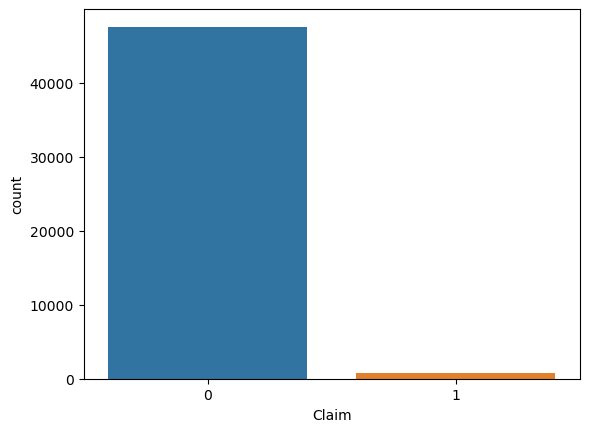

In [17]:
sns.countplot(data=df,x='Claim')
plt.show()

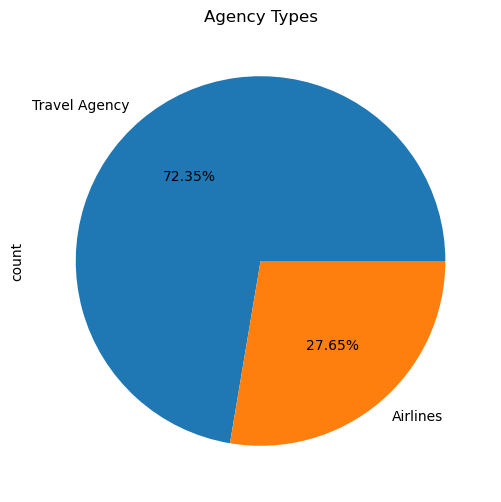

In [7]:

plt.figure(figsize=(6,6))
df['Agency Type'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title('Agency Types')
plt.show()

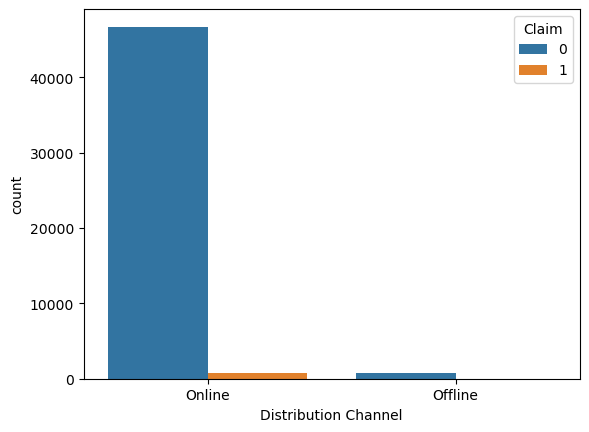

In [19]:
sns.countplot(data=df,x='Distribution Channel',hue='Claim')
plt.show()

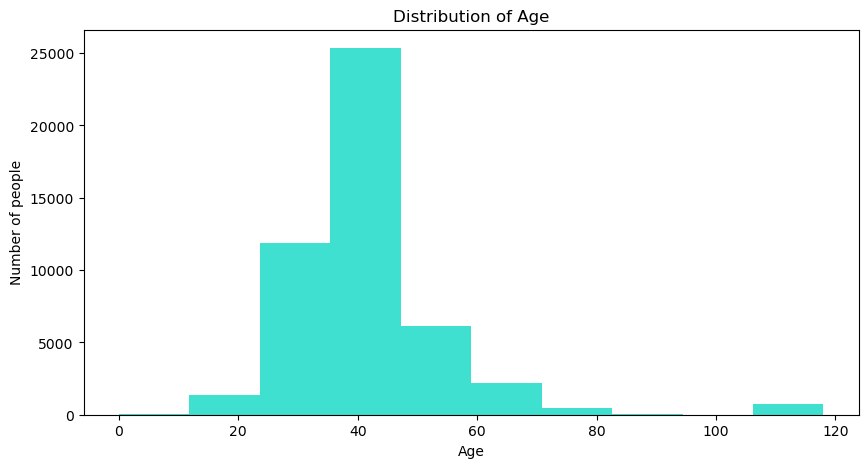

In [20]:
fig3 = plt.figure(figsize = (10, 5))
plt.hist(df['Age'],color='turquoise')
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.title("Distribution of Age")
plt.show()

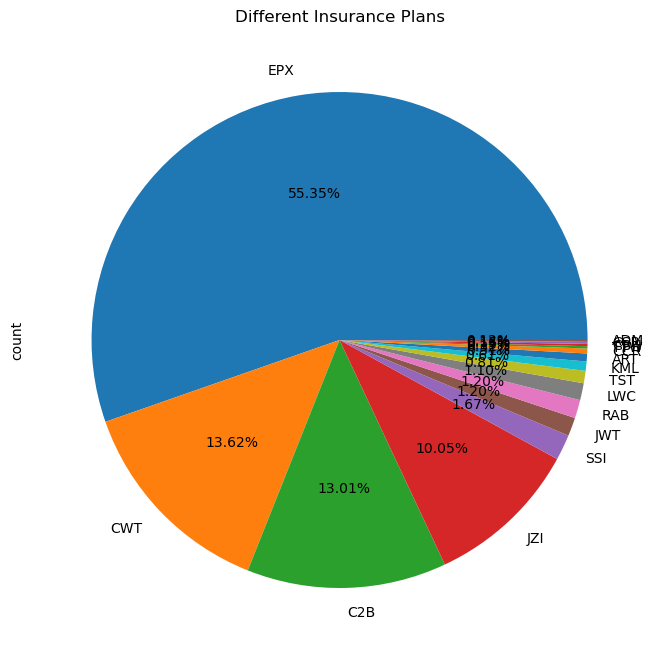

In [21]:
plt.figure(figsize=(8,12))
df['Agency'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title('Different Insurance Plans')
plt.show()

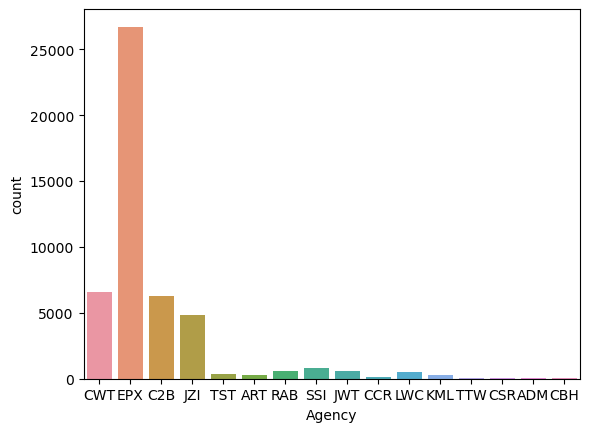

In [22]:
sns.countplot(data=df,x='Agency')
plt.show()

In [23]:
#Separating feature and target 
X=df.iloc[:,:-1] #All the rows ,all the columns except last col (feature)
y=df.iloc[:,-1] #All the rows of last col (target)

In [24]:
X.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,M,29
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,M,36
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,M,25
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,M,24
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,M,23


In [25]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Claim, dtype: int64

In [26]:
# Converting categorical columns into numerical

In [27]:
cat_col=X.select_dtypes(object).columns
cat_col

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Destination', 'Gender'],
      dtype='object')

In [28]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [29]:
X[cat_col]=oe.fit_transform(X[cat_col])
X

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,6.0,1.0,1.0,16.0,61,131.0,19.8,11.88,1.0,29
1,7.0,1.0,1.0,10.0,93,90.0,63.0,0.00,1.0,36
2,7.0,1.0,1.0,1.0,22,132.0,22.0,0.00,1.0,25
3,2.0,0.0,1.0,17.0,14,112.0,54.5,13.63,1.0,24
4,7.0,1.0,1.0,10.0,90,137.0,10.0,0.00,1.0,23
...,...,...,...,...,...,...,...,...,...,...
48255,7.0,1.0,1.0,1.0,39,25.0,44.0,0.00,1.0,36
48256,2.0,0.0,1.0,9.0,20,112.0,60.0,15.00,0.0,30
48257,6.0,1.0,1.0,16.0,19,4.0,29.7,17.82,1.0,43
48258,7.0,1.0,1.0,1.0,7,56.0,20.0,0.00,1.0,61


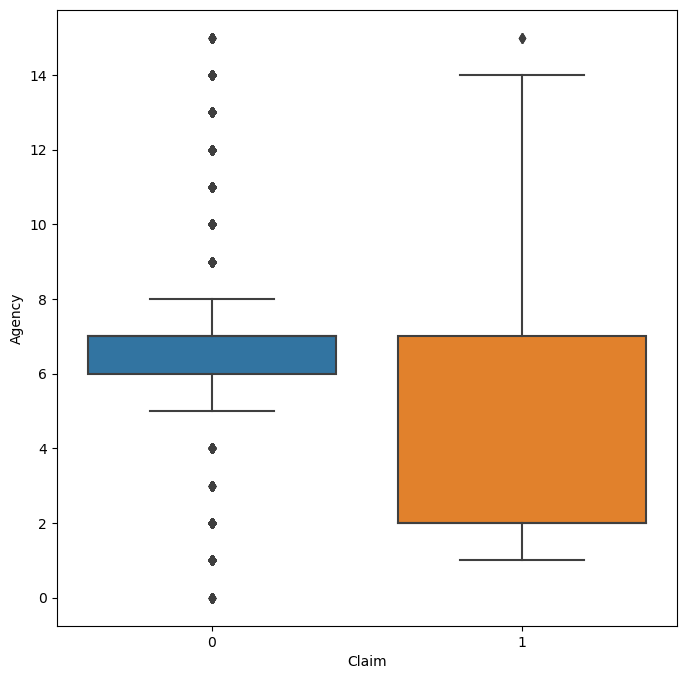

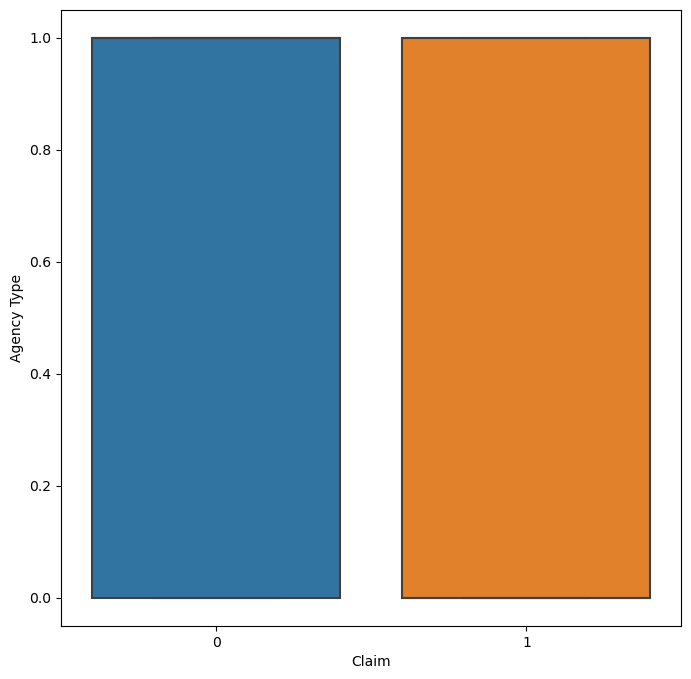

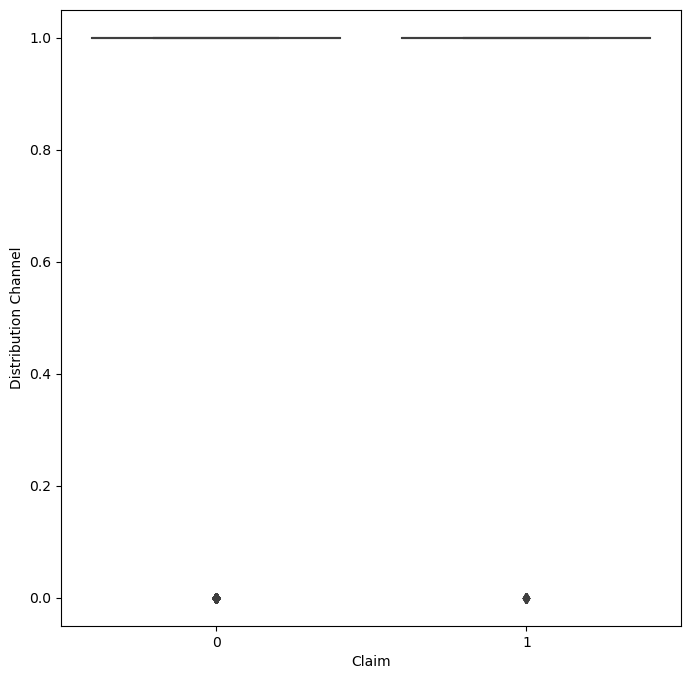

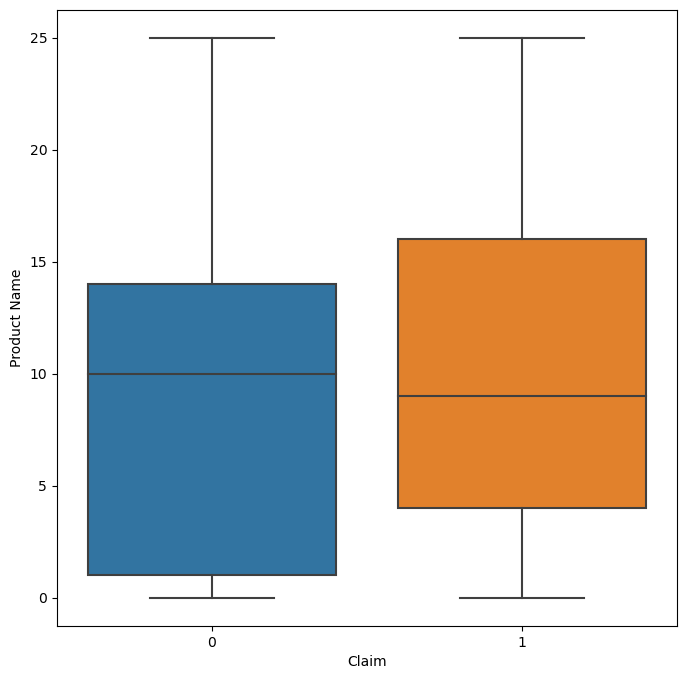

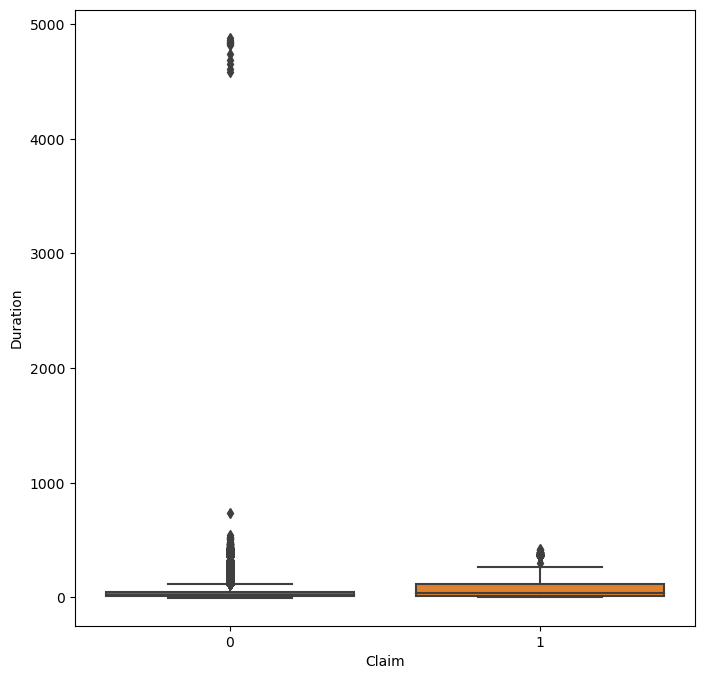

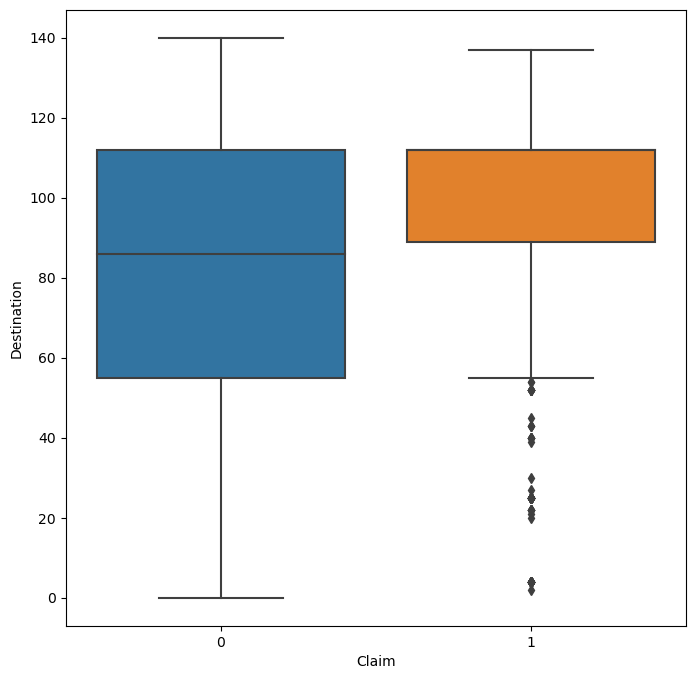

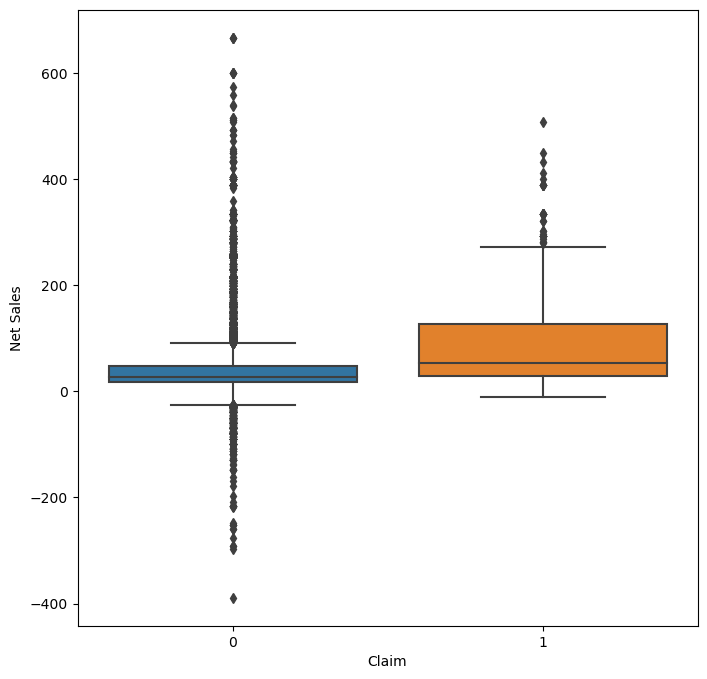

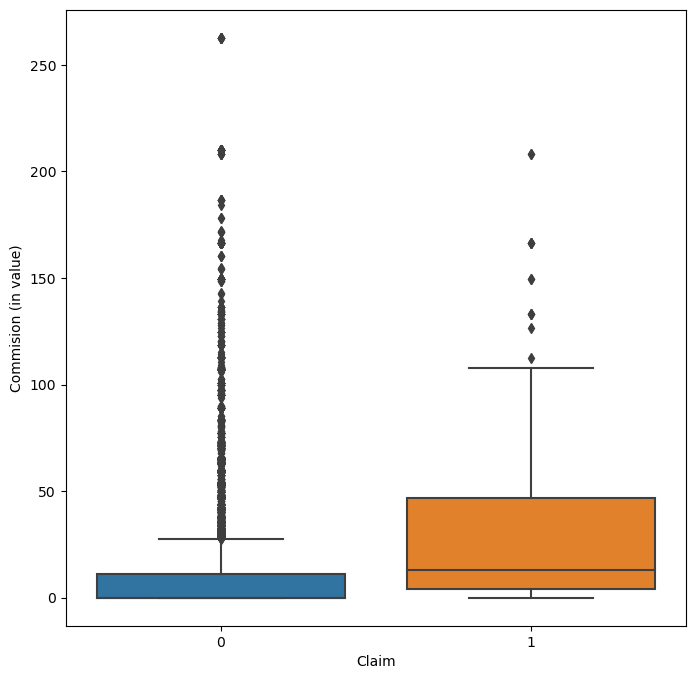

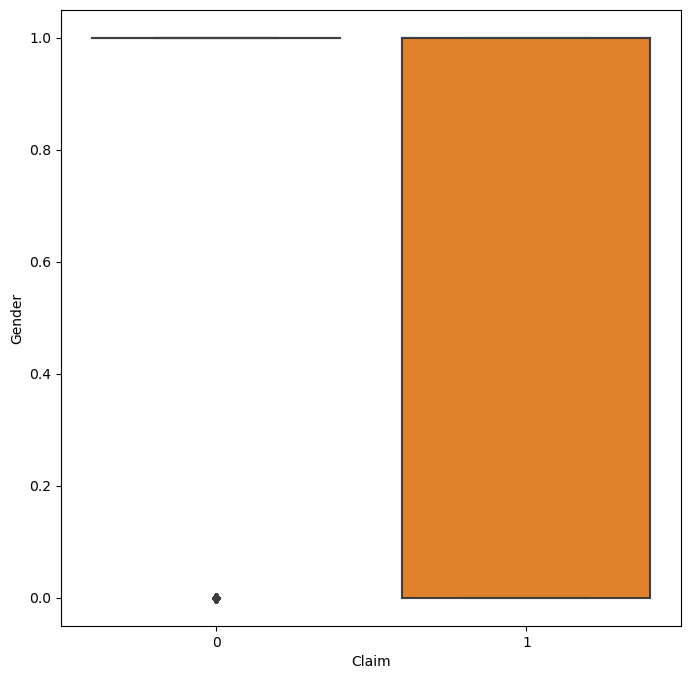

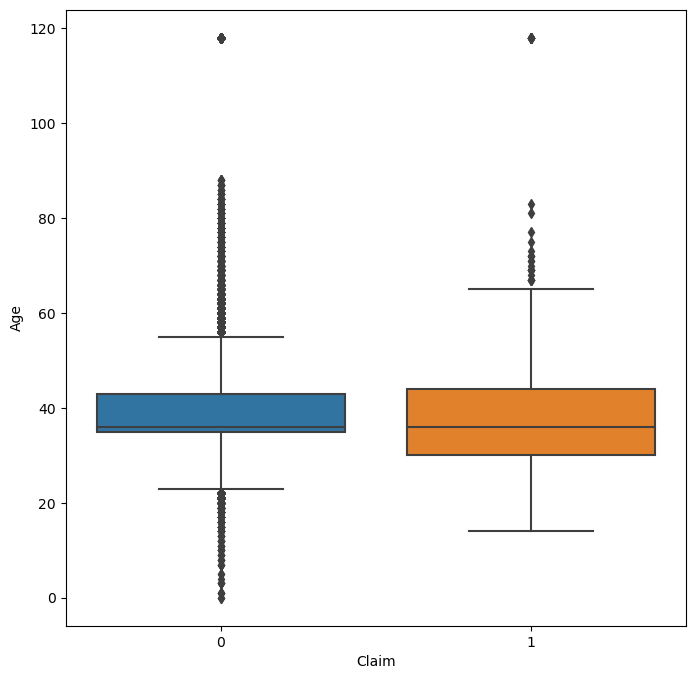

In [30]:
#Using Boxplot we check ouliers in each column
for col in X:
    plt.figure(figsize=(8,8))
    sns.boxplot(data=X,x=y,y=col)
    plt.show()

In [31]:
def treat_outliers(X,col):
    lower_limit, upper_limit = X[col].quantile([0.25,0.75])
    IQR = upper_limit - lower_limit
    lower_whisker = lower_limit - 1.5 * IQR
    upper_whisker = upper_limit + 1.5 * IQR
    return np.where(X[col]>upper_whisker,upper_whisker,np.where(X[col]<lower_whisker,lower_whisker,X[col]))


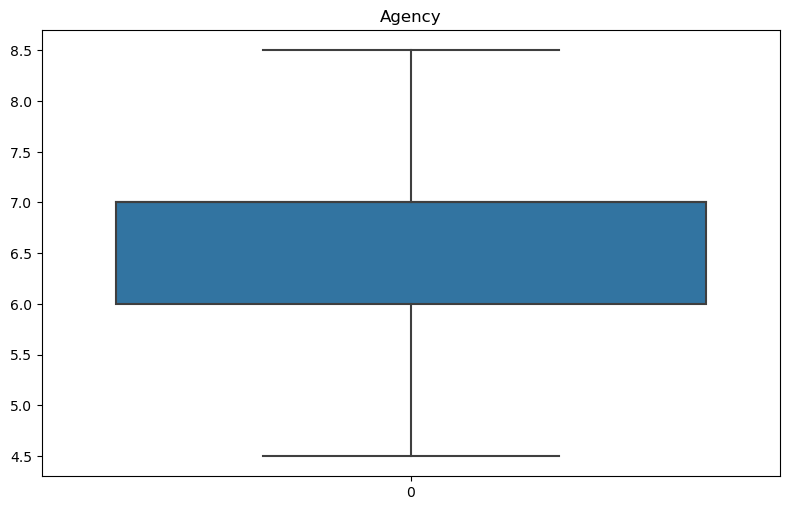

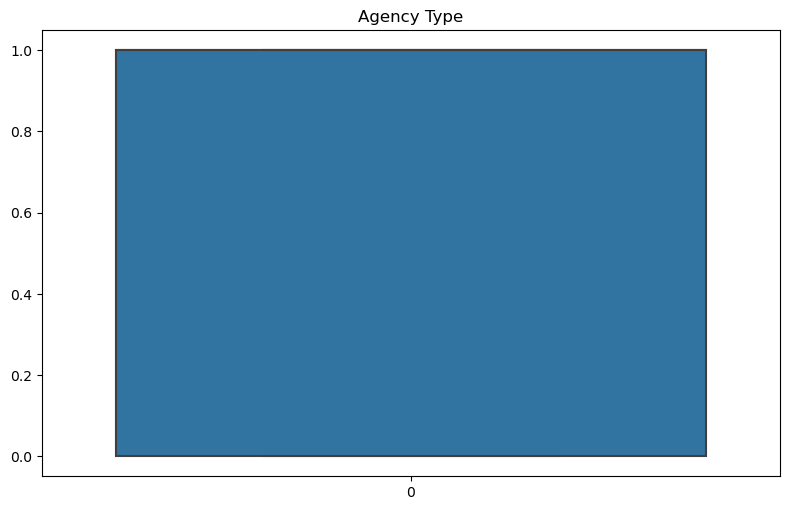

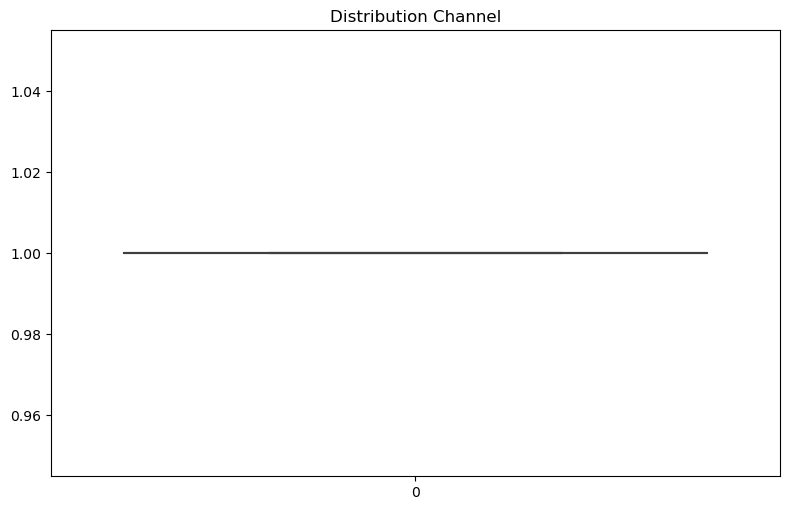

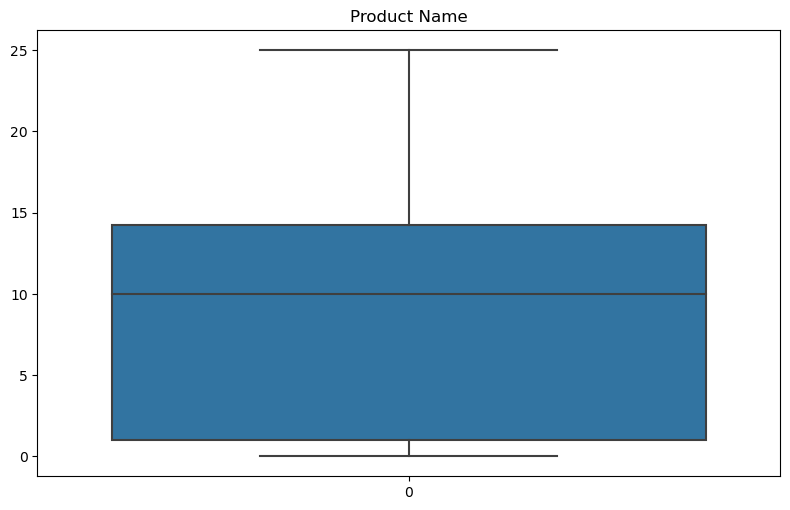

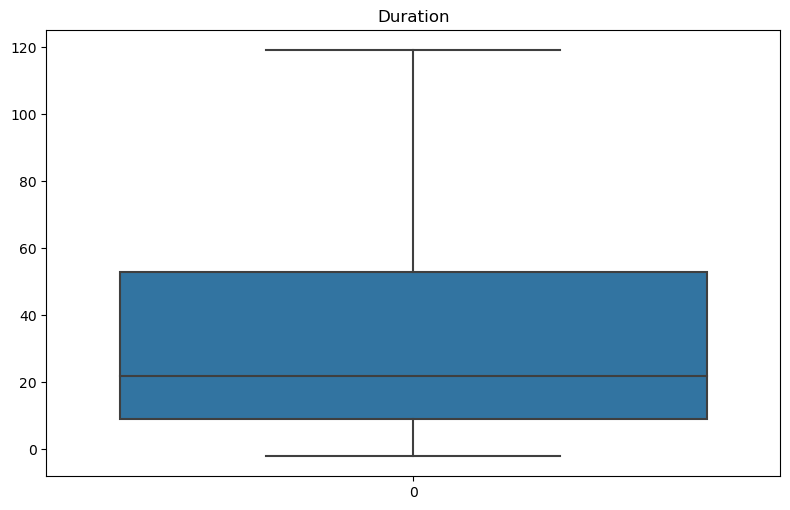

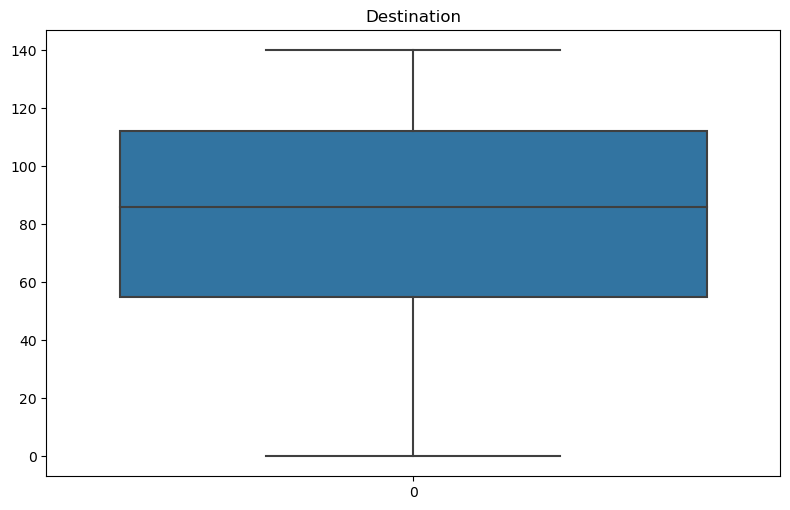

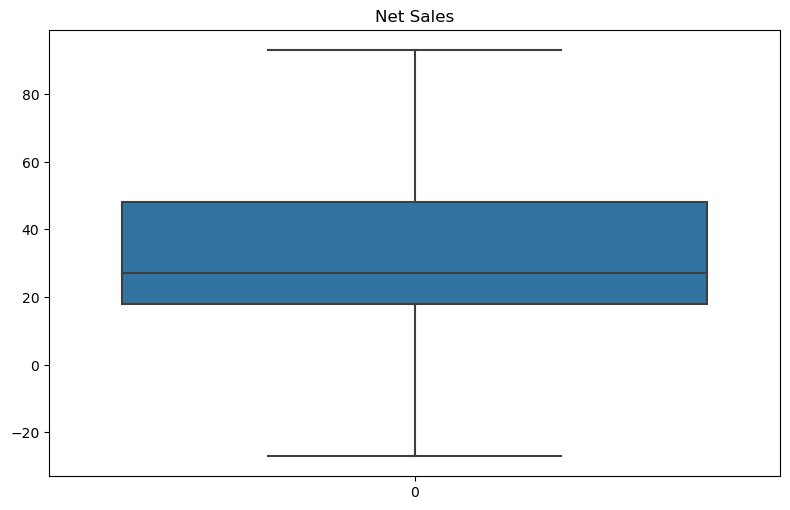

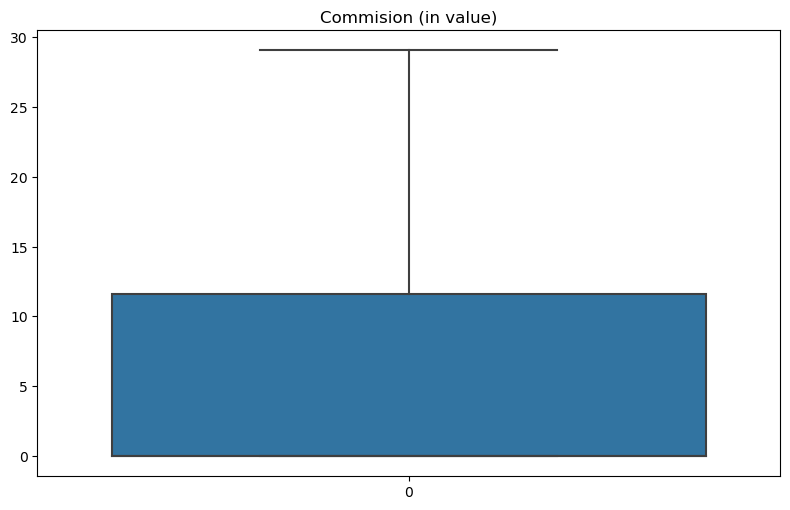

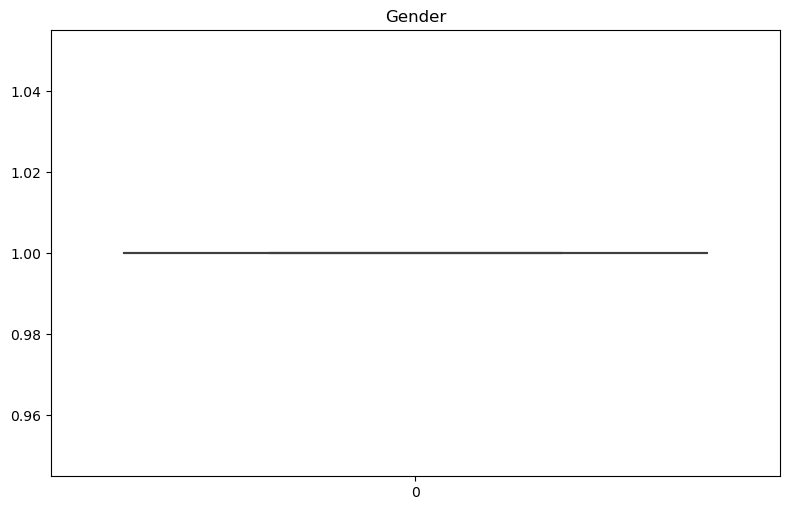

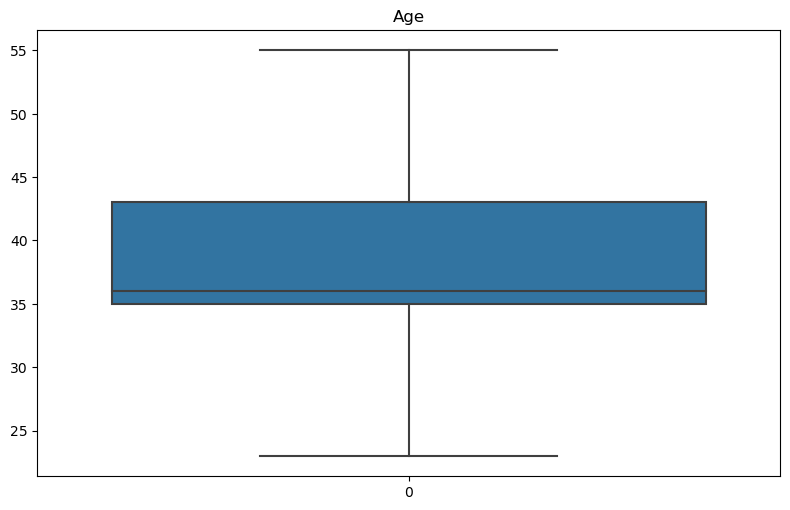

In [32]:
for col in X:
    plt.figure(figsize=(8,5))
    sns.boxplot(treat_outliers(X,col))
    plt.tight_layout()
    plt.title(col)
    plt.show()

In [33]:
#selecting numerical columns
colname=X.select_dtypes(['int64','float64']).columns
colname

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age'],
      dtype='object')

In [34]:
from scipy.stats import skew

Agency
-0.15181087674508847


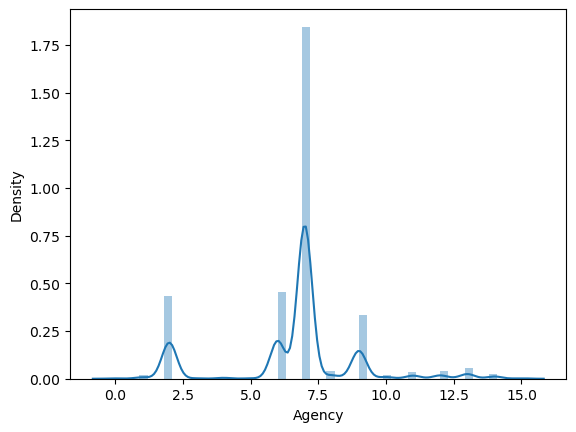

Agency Type
-0.9995061482440637


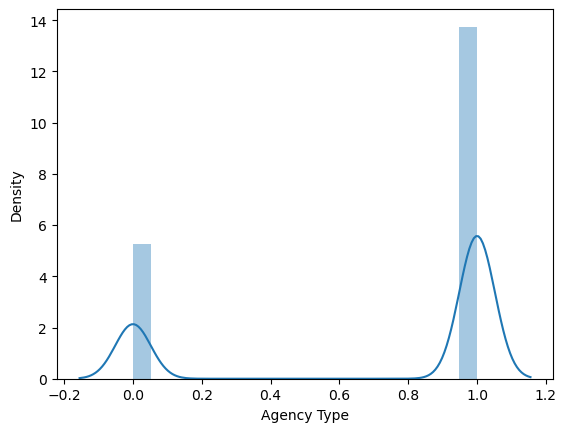

Distribution Channel
-7.446043499106435


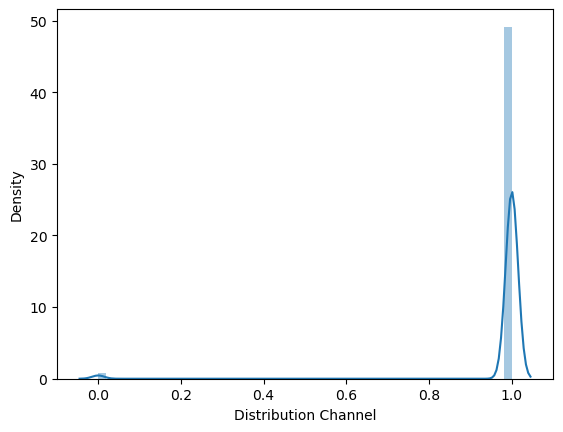

Product Name
0.4097510472793213


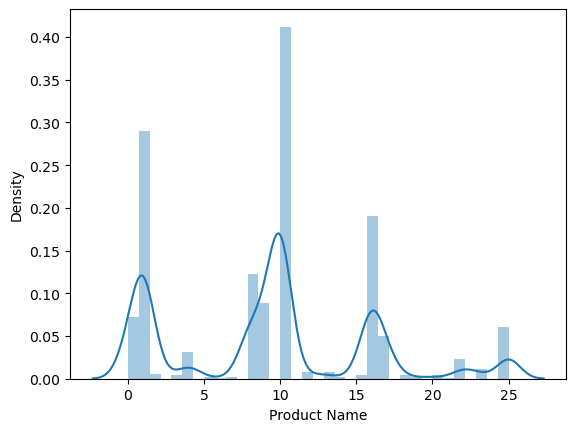

Duration
23.739869453451895


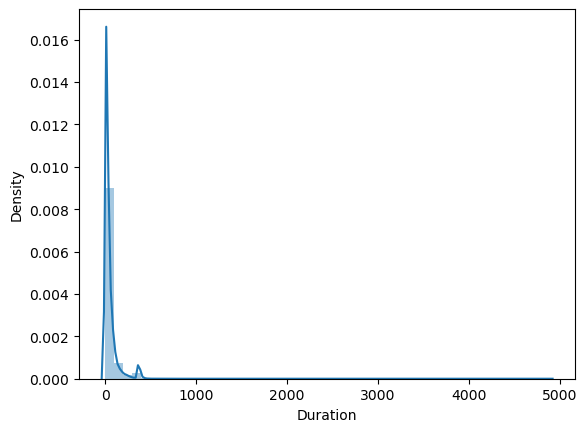

Destination
-0.4671345884364441


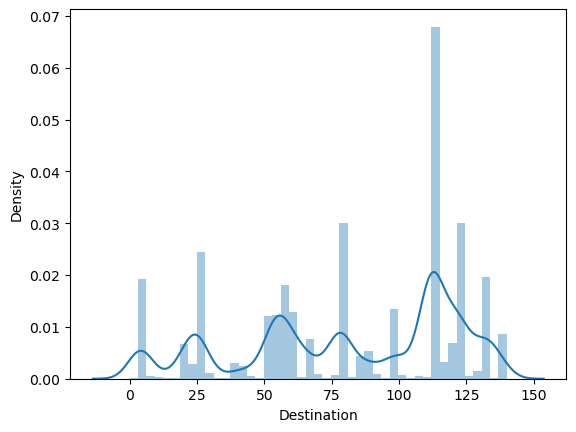

Net Sales
3.3097749815890696


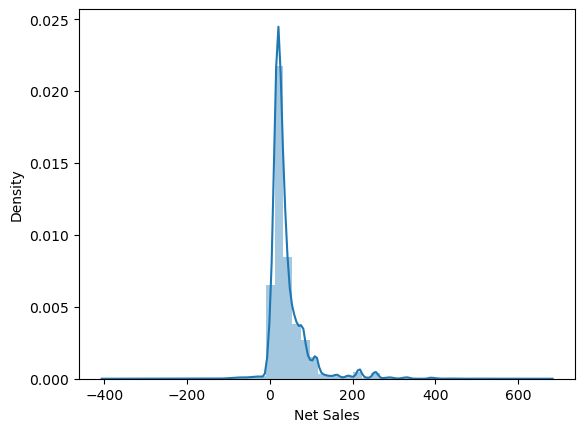

Commision (in value)
3.987692199537103


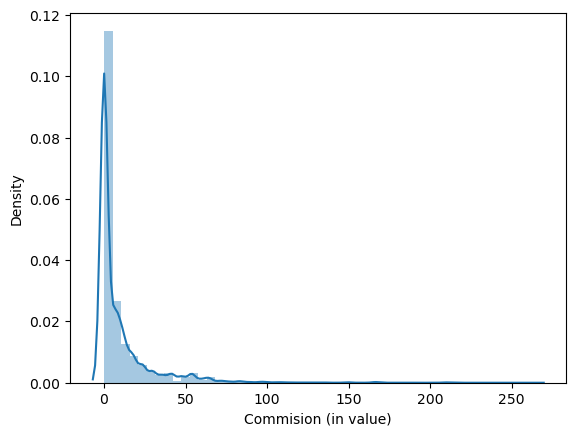

Gender
-2.073617453907091


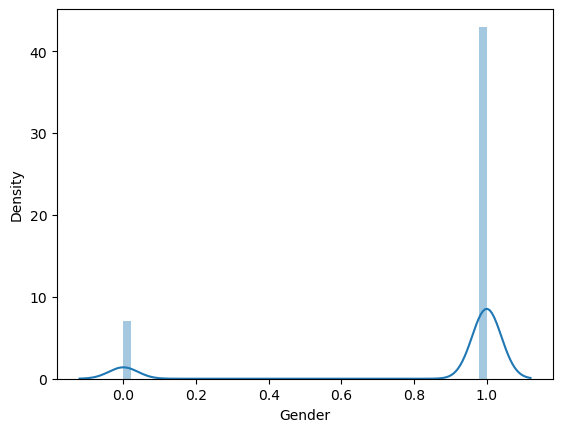

Age
2.9964566570232365


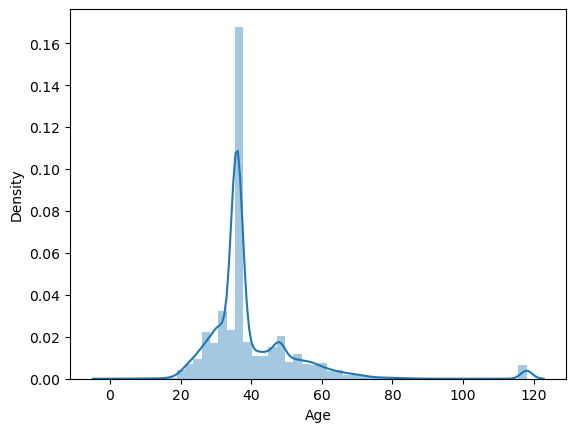

In [35]:
#using for loop to check skewness of all the numeric columns
for col in X[colname]:
    print(col)
    print(skew(X[col]))
    plt.figure()
    sns.distplot(X[col])
    plt.show()

In [36]:
#check correlation between features
X.corr()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age
Agency,1.000000,0.202276,-0.186974,0.140633,-0.073478,-0.206409,-0.244945,-0.170321,0.194408,0.121757
Agency Type,0.202276,1.000000,-0.075859,-0.272547,-0.109550,-0.145978,-0.159489,-0.181890,0.526606,-0.223913
Distribution Channel,-0.186974,-0.075859,1.000000,-0.152455,-0.039595,-0.055580,0.012463,0.006095,0.170877,-0.155635
Product Name,0.140633,-0.272547,-0.152455,1.000000,-0.046941,-0.073233,-0.077206,0.291312,-0.152790,0.273615
Duration,-0.073478,-0.109550,-0.039595,-0.046941,1.000000,0.072928,0.416221,0.334920,-0.100363,0.002555
Destination,-0.206409,-0.145978,-0.055580,-0.073233,0.072928,1.000000,0.076164,-0.010061,-0.125152,-0.041038
Net Sales,-0.244945,-0.159489,0.012463,-0.077206,0.416221,0.076164,1.000000,0.651033,-0.155685,0.034262
Commision (in value),-0.170321,-0.181890,0.006095,0.291312,0.334920,-0.010061,0.651033,1.000000,-0.187176,0.118530
Gender,0.194408,0.526606,0.170877,-0.152790,-0.100363,-0.125152,-0.155685,-0.187176,1.000000,-0.089728
Age,0.121757,-0.223913,-0.155635,0.273615,0.002555,-0.041038,0.034262,0.118530,-0.089728,1.000000


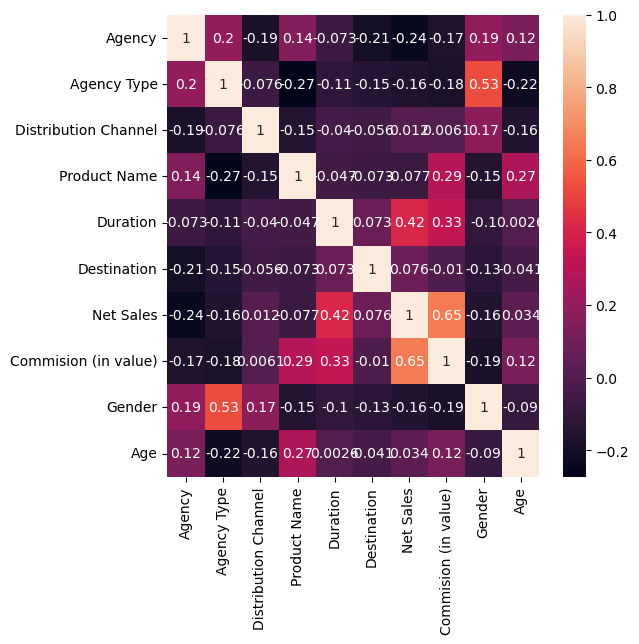

In [37]:
plt.figure(figsize=(6,6))
sns.heatmap(X.corr(),annot=True)
plt.show()
#dark color shows negative correlation
#light color shoes positive correlation
#It is very clear from the heatmap that most of the variables are not dependent on each other

In [38]:
#Splitting training and testing dataset
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=1)

In [39]:
xtrain.shape

(33782, 10)

In [40]:
ytrain.shape

(33782,)

In [41]:
xtest.shape

(14478, 10)

In [42]:
ytest.shape

(14478,)

# Decision Tree classifier

In [43]:
#Decision tree model
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier() #model1 is the object of decision tree

In [44]:
model1.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [45]:
#testing model with test data score
y_pred=model1.predict(xtest)
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     14262
           1       0.05      0.06      0.06       216

    accuracy                           0.97     14478
   macro avg       0.52      0.52      0.52     14478
weighted avg       0.97      0.97      0.97     14478



In [46]:
model1.get_depth()

26

In [47]:
#creating a  new model with reduced depth
model2=DecisionTreeClassifier(max_depth=10)
model2.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=10)

In [48]:
#predicting o/p
y_pred2=model2.predict(xtest)
print(classification_report(ytest,y_pred2))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14262
           1       0.04      0.01      0.02       216

    accuracy                           0.98     14478
   macro avg       0.51      0.50      0.50     14478
weighted avg       0.97      0.98      0.98     14478



# Conclusion:
- Decision tree classifier gives us 98% accuracy

# Random forest classifier

In [49]:
#RF classifier
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf=RandomForestClassifier(n_estimators=70,max_depth=10,max_features=5)
#n_estimators:no of decision trees

In [51]:
#training model
rf.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=10, max_features=5, n_estimators=70)

In [52]:
#testing model
y_pred=rf.predict(xtest)
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14262
           1       0.00      0.00      0.00       216

    accuracy                           0.98     14478
   macro avg       0.49      0.50      0.50     14478
weighted avg       0.97      0.98      0.98     14478



# Conclusion:
- Random forest classifier algorithm gives us 98% accuracy 
- which is better than decision tree classifier by 1%

In [53]:
from sklearn.ensemble import AdaBoostClassifier

In [54]:
#Adaboost model
model2=AdaBoostClassifier(n_estimators=100,random_state=1)

In [55]:
#train the model
model2.fit(xtrain,ytrain)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [56]:
#test our model
ypred=model2.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14262
           1       0.00      0.00      0.00       216

    accuracy                           0.99     14478
   macro avg       0.49      0.50      0.50     14478
weighted avg       0.97      0.99      0.98     14478

